In [77]:
import pandas as pd
import numpy as np
import seaborn as sns 
import matplotlib.pyplot as plt
import tensorflow as tf
import matplotlib.gridspec as gridspec
import matplotlib.style as style
import scipy.stats as stats
import keras 
from keras.layers import Dense, Dropout, Input
from keras.models import Sequential

In [78]:
# Load the data
train_data = pd.read_csv(r"C:\Users\w1381\桌面\python-projects\5241\train.csv")

In [79]:
# Overview of the data
print(train_data.head(5))


   PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                           Allen, Mr. William Henry    male  35.0      0   

   Parch            Ticket     Fare Cabin Embarked  
0      0         A/5 21171   7.2500   NaN        S  
1      0          PC 17599  71.2833   C85        C  
2      0  STON/O2. 3101282   7.9250   NaN        S  
3      0            113803  53.1000  C123        S  
4      0            373450   8.0500   NaN        S  


In [80]:
print(train_data.describe())

       PassengerId    Survived      Pclass         Age       SibSp  \
count   891.000000  891.000000  891.000000  714.000000  891.000000   
mean    446.000000    0.383838    2.308642   29.699118    0.523008   
std     257.353842    0.486592    0.836071   14.526497    1.102743   
min       1.000000    0.000000    1.000000    0.420000    0.000000   
25%     223.500000    0.000000    2.000000   20.125000    0.000000   
50%     446.000000    0.000000    3.000000   28.000000    0.000000   
75%     668.500000    1.000000    3.000000   38.000000    1.000000   
max     891.000000    1.000000    3.000000   80.000000    8.000000   

            Parch        Fare  
count  891.000000  891.000000  
mean     0.381594   32.204208  
std      0.806057   49.693429  
min      0.000000    0.000000  
25%      0.000000    7.910400  
50%      0.000000   14.454200  
75%      0.000000   31.000000  
max      6.000000  512.329200  


In [81]:
print(train_data.shape) 

(891, 12)


Cabin       687
Age         177
Embarked      2
dtype: int64


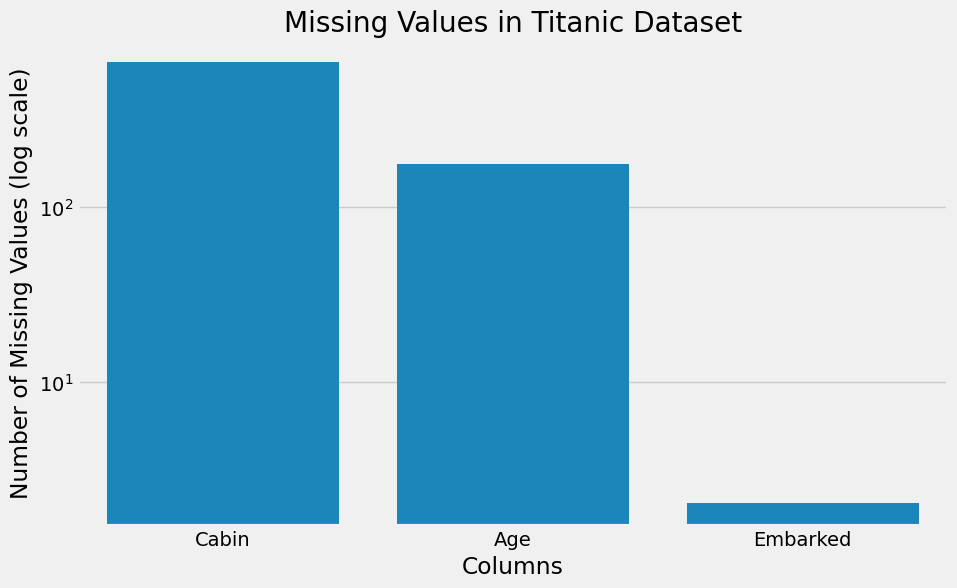

In [82]:
# visualization of the data
# plot missing value
# Calculate missing values
missing_values = train_data.isnull().sum()
missing_values = missing_values[missing_values > 0].sort_values(ascending=False)
print(missing_values)

# Plotting missing values
plt.figure(figsize=(10, 6))
sns.barplot(x=missing_values.index, y=missing_values.values)
plt.title('Missing Values in Titanic Dataset')
plt.xlabel('Columns')
plt.ylabel('Number of Missing Values')
# Scale the y-axis to make smaller values more noticeable
plt.yscale('log')
plt.ylabel('Number of Missing Values (log scale)')
plt.show()

In [83]:
# create function for boxplot of numerical cols
# visualization of nomality of numerical cols (function creation)
def visualization_num(data, feature):
    style.use('fivethirtyeight')

    # Creating a customized chart. and giving in figsize and other parameters.
    fig = plt.figure(constrained_layout=True, figsize=(12,8))
    # creating a grid of 3 cols and 3 rows.
    grid = gridspec.GridSpec(ncols=3, nrows=3, figure=fig)

    ## Customizing the histogram grid.
    ax1 = fig.add_subplot(grid[0,0])
    ## Set the title.
    ax1.set_title('Histogram')
    ## plot the histogram.
    sns.histplot(data.loc[: , feature]  , ax = ax1)

    # customizing the QQ_plot.
    ax2 = fig.add_subplot(grid[0,1])
    ## Plotting the QQ-Plot.
    stats.probplot(data.loc[:,feature], plot = ax2)
    ## Set the title.
    ax2.set_title('QQ-Plot')

    ## Customizing the Box Plot.
    ax3 = fig.add_subplot(grid[0,2])
    ## Set title.
    ax3.set_title('Box Plot')
    ## Plotting the box plot.
    sns.boxplot(data.loc[:,feature], orient='v', ax = ax3)

In [84]:
# Identify non-numerical and numerical columns
categorical_cols = train_data.select_dtypes(include=['object', 'bool']).columns
numerical_cols = train_data.select_dtypes(include=['int64', 'float64']).columns

In [85]:
categorical_cols

Index(['Name', 'Sex', 'Ticket', 'Cabin', 'Embarked'], dtype='object')

In [86]:
numerical_cols

Index(['PassengerId', 'Survived', 'Pclass', 'Age', 'SibSp', 'Parch', 'Fare'], dtype='object')

In [87]:
# remove unnecessary ('fake', categorical actually) numerical feature for visualization
selected_cols = numerical_cols.drop(['PassengerId','Pclass', 'SibSp', 'Parch'])

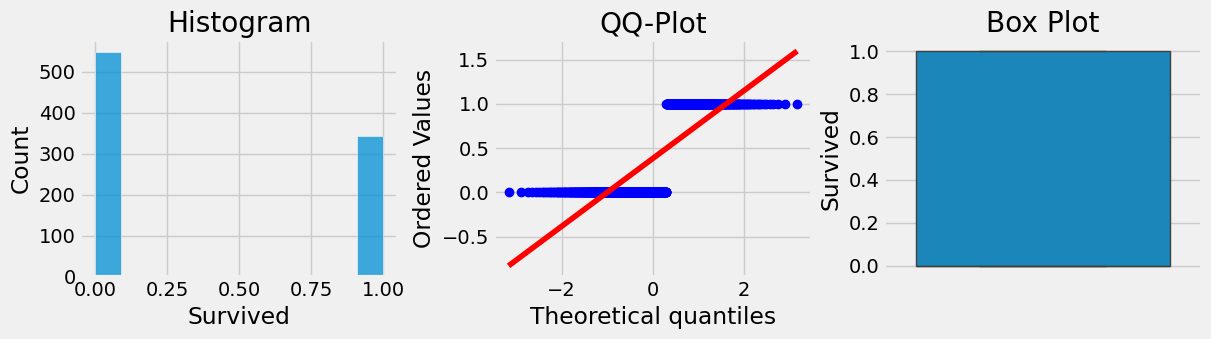

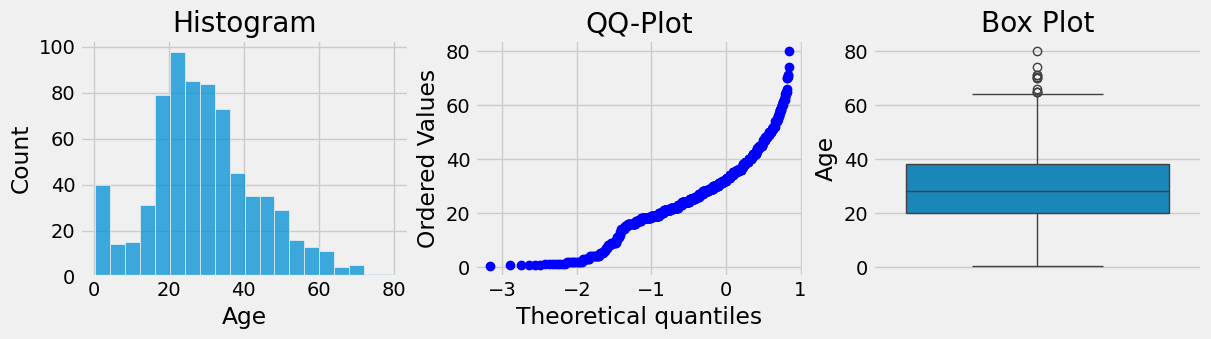

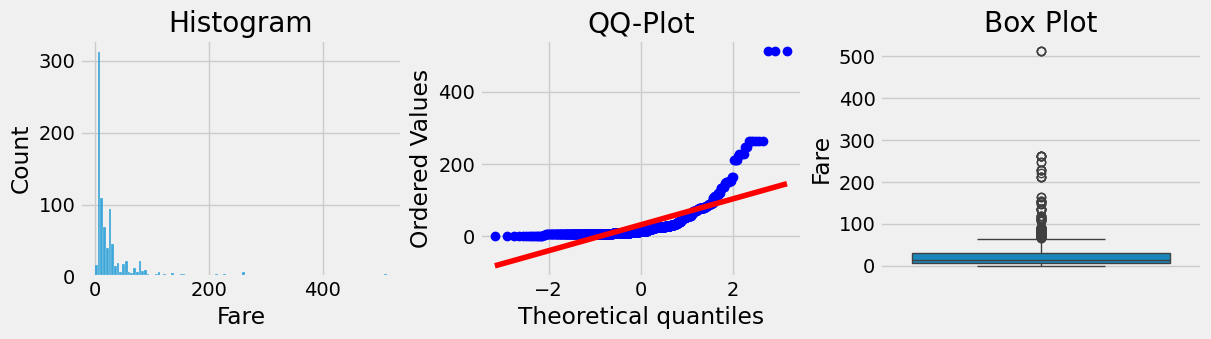

In [88]:
# visualization of selected features
for i in selected_cols:
    visualization_num(train_data, i)



In [89]:
# Remove 'name' in categorical column
selected_cols = categorical_cols.drop(["Name", "Ticket","Cabin"])


In [90]:
# visualization of categorical data
def visualization_cat(data, feature):
    # Creating a customized chart. and giving in figsize and other parameters.
    fig = plt.figure(constrained_layout=True, figsize=(12,8))
    # creating a grid of 1 cols and 1 rows.
    grid = gridspec.GridSpec(ncols=1, nrows=2, figure=fig)
    ## Customizing the histogram grid.
    ax1 = fig.add_subplot(grid[0,0])
    ## Set the title.
    ax1.set_title('Histogram')
    ## plot the histogram.
    sns.countplot(x = feature, data = data, ax = ax1, hue=feature)

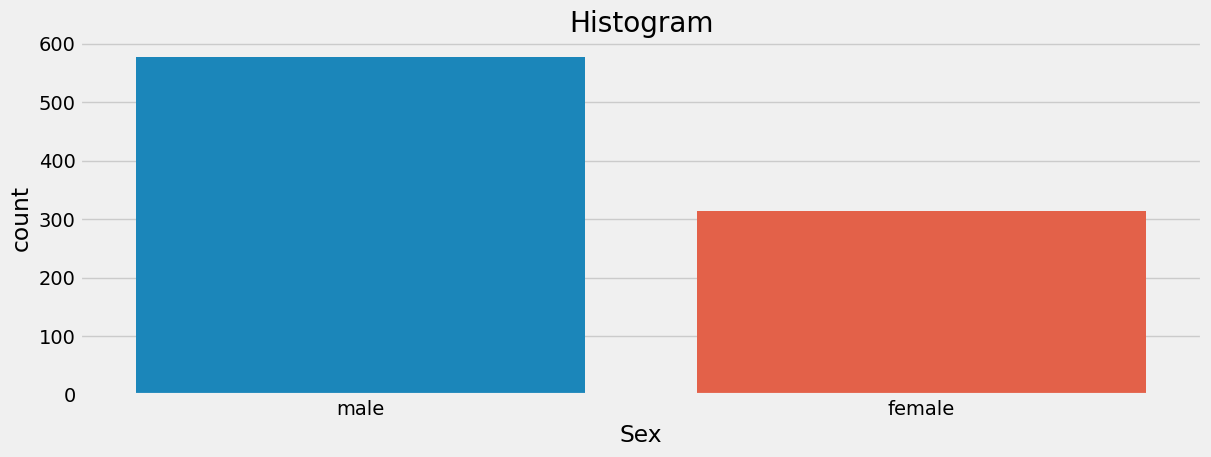

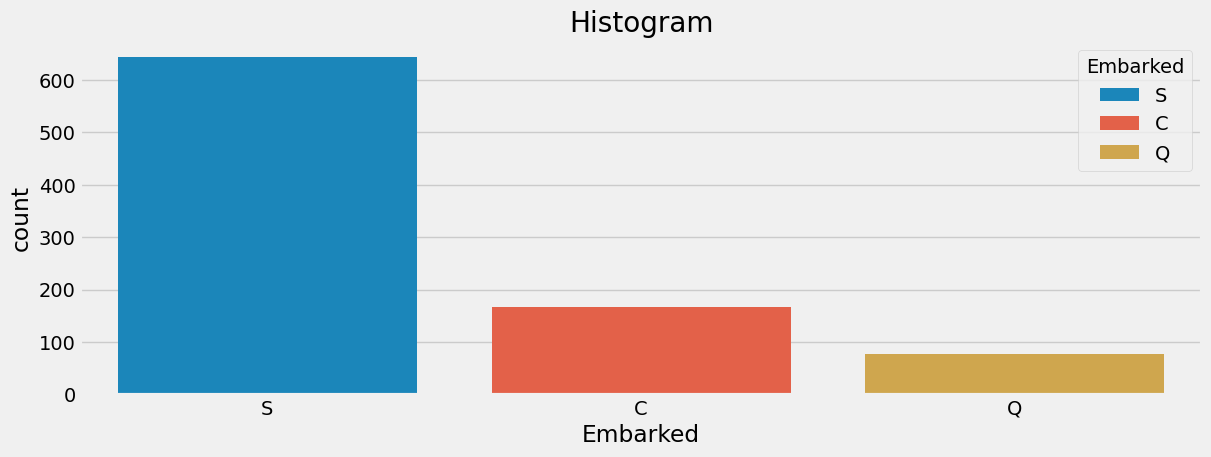

In [91]:
# Visualizing of categorical data
for i in selected_cols:
    visualization_cat(train_data, i)

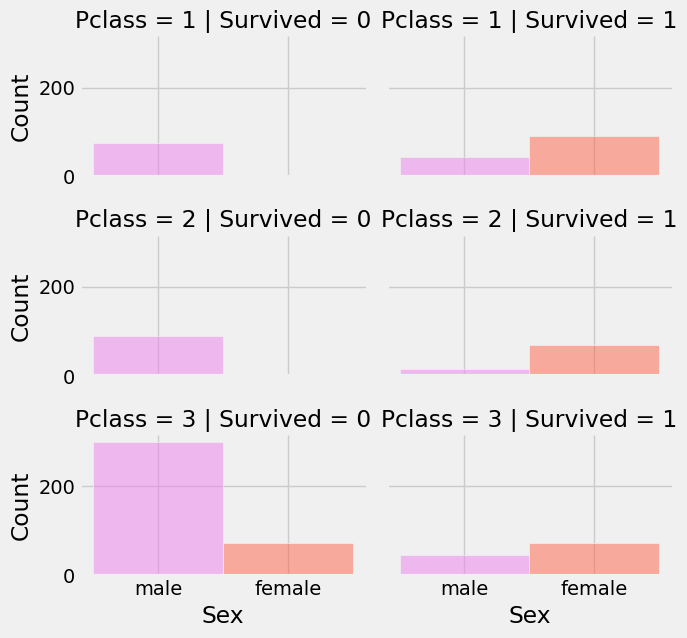

In [92]:
# visualizing of Sex and survival based on Pclass
grid = sns.FacetGrid(train_data, col='Survived', row='Pclass', height=2.2, aspect=1.6)
grid.map(sns.histplot, 'Sex', alpha=.5, hue = train_data['Sex'], palette = ['violet','tomato'])
plt.show()

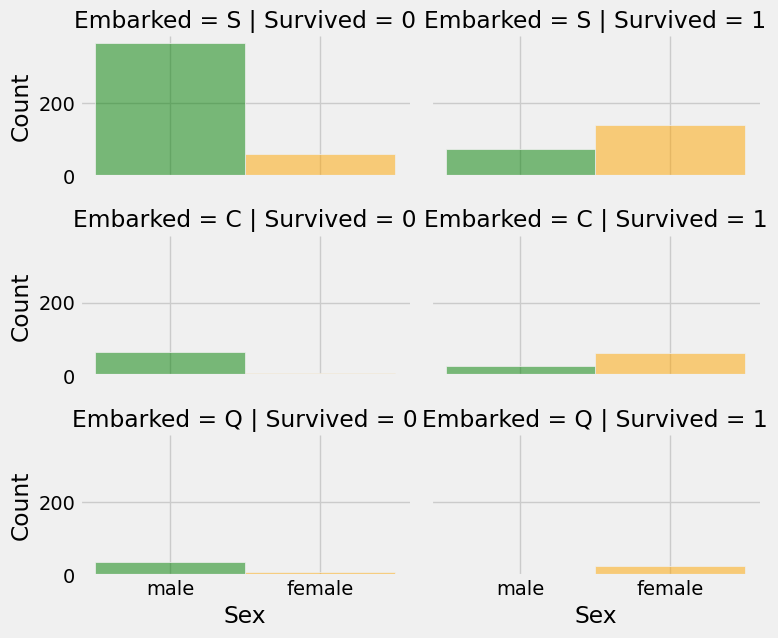

In [93]:
# visualizing of Sex and survival based on Embarked
grid = sns.FacetGrid(train_data, col='Survived', row='Embarked', height=2.2, aspect=1.8)
grid.map(sns.histplot, 'Sex',alpha=.5, hue = train_data['Sex'], palette = ['green','orange'])
plt.show()

C:\Users\w1381\AppData\Local\Temp\ipykernel_31176\2485304667.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(train_data.corr())


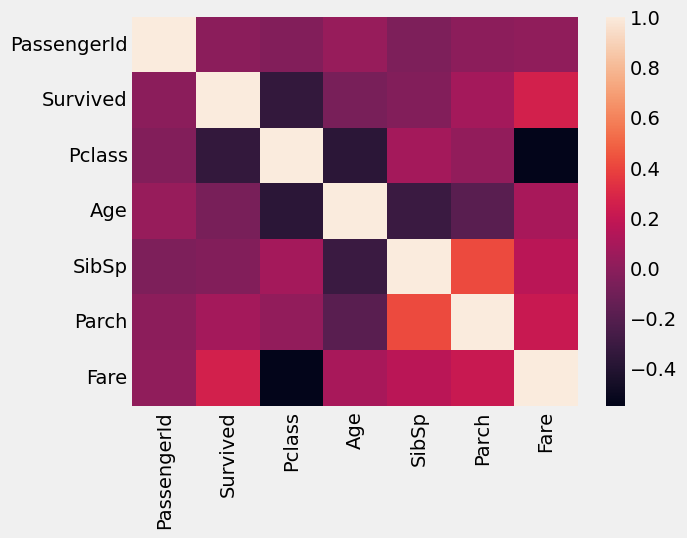

In [94]:
# Plot the correlation matrix of the train_data
sns.heatmap(train_data.corr())
plt.show()

# We see that there is correlation ship between "Parch" and "Sibsp"

In [95]:
# Import test data
test_data = pd.read_csv(r"C:\Users\w1381\桌面\python-projects\5241\test.csv")

In [96]:
# Drop Cabin, Id, Pclass and Ticket column from both data.
train_data.drop(['Cabin', 'PassengerId', 'Ticket'], axis = 1, inplace = True)
test_data.drop(['Cabin', 'PassengerId', 'Ticket'], axis = 1, inplace = True)


In [97]:
# Fill missing value for train and test simultaneously
data = [train_data, test_data]
for df in data:
    df.Age.fillna(df.Age.mean(), inplace = True)
    df.Fare.fillna(df.Fare.mean(), inplace = True)


# Filling the missing value with 'S'
train_data.Embarked.fillna('S', inplace = True)

In [98]:
# Change gender into numercial value (one-hot encoder)
train_data["Sex"] = train_data["Sex"].map({'female':1, 'male':0})
test_data["Sex"] = test_data["Sex"].map({'female':1, 'male':0})

In [99]:
# Map "Embarked" into numerical value
mapping = {'S':0,'C':1,'Q':2}
train_data["Embarked"] = train_data["Embarked"].map(mapping)
test_data["Embarked"] = test_data["Embarked"].map(mapping)

In [100]:
# Transform "Sibsp" and "Parch" into new binary feature called "Single"
train_data["Single"] = train_data["SibSp"] + train_data["Parch"]
test_data["Single"] = test_data["SibSp"] + test_data["Parch"]

train_data["Single"]= train_data["Single"].apply(lambda x: 1 if x == 0 else 0)
test_data["Single"] = test_data["Single"].apply(lambda x: 1 if x == 0 else 0)

In [101]:
# Drop SibSp and Parch column for both training and testing data
train_data.drop(['SibSp','Parch'], axis = 1, inplace = True)
test_data.drop(['SibSp','Parch'], axis = 1, inplace = True )

In [102]:
# Get title of all names
train_data.Name.str.extract(' ([A-Za-z]+)\.', expand=False).unique()

array(['Mr', 'Mrs', 'Miss', 'Master', 'Don', 'Rev', 'Dr', 'Mme', 'Ms',
       'Major', 'Lady', 'Sir', 'Mlle', 'Col', 'Capt', 'Countess',
       'Jonkheer'], dtype=object)

In [103]:
# Create the Title feature which contain the title of the passenger and drop 'Name' column
for df in data:
    df['Title'] = df.Name.str.extract('([A-Za-z]+)\.', expand = False)
    df.drop('Name', axis = 1, inplace = True)

In [104]:
# Double check
print(train_data['Title'].value_counts())
print(test_data['Title'].value_counts())

Mr          517
Miss        182
Mrs         125
Master       40
Dr            7
Rev           6
Mlle          2
Major         2
Col           2
Countess      1
Capt          1
Ms            1
Sir           1
Lady          1
Mme           1
Don           1
Jonkheer      1
Name: Title, dtype: int64
Mr        240
Miss       78
Mrs        72
Master     21
Col         2
Rev         2
Ms          1
Dr          1
Dona        1
Name: Title, dtype: int64


In [105]:
# Replace least occuring title in the data with rare
mask = train_data['Title'].value_counts() < 10
least_occuring = mask[mask].index.to_list()

mask = test_data['Title'].value_counts() < 10
least_occuring += mask[mask].index.to_list()

# Using Set data structure to remove repeated 'Title'
least_occuring = list(set(least_occuring))
print(least_occuring)

for df in data:
    df['Title'] = df['Title'].replace(least_occuring, 'Rare')

['Dona', 'Ms', 'Sir', 'Major', 'Col', 'Mlle', 'Mme', 'Countess', 'Don', 'Jonkheer', 'Rev', 'Dr', 'Lady', 'Capt']


In [106]:
# Transform 'Title' into reasonable ordinal values
mapping = {"Mr": 1, "Miss": 2, "Mrs": 3, "Master": 4, "Rare": 5}
for df in data:
    df['Title'] = df['Title'].map(mapping)

In [107]:
# Transform 'Age' into several ordinal values
for df in data:    
    df.loc[ df['Age'] <= 16, 'Age'] = 0
    df.loc[(df['Age'] > 16) & (df['Age'] <= 30), 'Age'] = 1
    df.loc[(df['Age'] > 30) & (df['Age'] <= 50), 'Age'] = 2
    df.loc[(df['Age'] > 50) & (df['Age'] <= 75), 'Age'] = 3
    df.loc[ df['Age'] > 75, 'Age'] = 4

In [108]:
# Transform 'Fare' into several ordinal values
for df in data:
    df.loc[df['Fare'] < 30, 'Fare'] = 1
    df.loc[(df['Fare'] >= 30) & (df['Fare'] < 50),'Fare'] = 2
    df.loc[(df['Fare'] >= 50) & (df['Fare'] < 100),'Fare'] = 3
    df.loc[(df['Fare'] >= 100),'Fare'] = 4

In [109]:
# Extract X and y for model training
Y_train = train_data["Survived"]
X_train = train_data.drop("Survived", axis=1)
X_test = test_data
print("shape of X_train",X_train.shape)
print("Shape of Y_train",Y_train.shape)
print("Shape of x_test",X_test.shape)

shape of X_train (891, 7)
Shape of Y_train (891,)
Shape of x_test (418, 7)


In [110]:
X_test

,Pclass,Sex,Age,Fare,Embarked,Single,Title
0,3,0,2.0,1.0,2,1,1
1,3,1,2.0,1.0,0,0,3
2,2,0,3.0,1.0,2,1,1
3,3,0,1.0,1.0,0,1,1
4,3,1,1.0,1.0,0,0,3
...,...,...,...,...,...,...,...
413,3,0,2.0,1.0,0,1,1
414,1,1,2.0,4.0,1,1,5
415,3,0,2.0,1.0,0,1,1
416,3,0,2.0,1.0,0,1,1


In [111]:
model = Sequential()
model.add(Dense(units = 32, input_shape = (7,), activation = 'relu'))
model.add(Dense(units = 64, activation = 'relu', kernel_initializer = 'he_normal', use_bias = False))
model.add(tf.keras.layers.BatchNormalization())
model.add(Dense(units = 128, activation = 'relu',kernel_initializer = 'he_normal', use_bias = False))
model.add(Dropout(0.1))
model.add(Dense(units = 64, activation = 'relu',kernel_initializer = 'he_normal', use_bias = False))
model.add(Dropout(0.1))
model.add(Dense(units = 32, activation = 'relu'))
model.add(Dropout(0.15))
model.add(Dense(units = 16, activation = 'relu'))
model.add(Dense(units = 8, activation = 'relu',kernel_initializer = 'he_normal', use_bias = False))
model.add(Dense(units =1 , activation = 'sigmoid'))

c:\Users\w1381\桌面\python-projects\venv\Lib\site-packages\keras\src\layers\core\dense.py:88: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [112]:
model.compile(loss = tf.keras.losses.binary_crossentropy, optimizer = tf.keras.optimizers.Adam(), metrics = ['acc'])
model.fit(X_train, Y_train, batch_size = 32, verbose = 2, epochs = 50)

Epoch 1/50
28/28 - 2s - 74ms/step - acc: 0.6274 - loss: 0.6649
Epoch 2/50
28/28 - 0s - 2ms/step - acc: 0.7778 - loss: 0.5032
Epoch 3/50
28/28 - 0s - 2ms/step - acc: 0.7879 - loss: 0.4815
Epoch 4/50
28/28 - 0s - 2ms/step - acc: 0.8036 - loss: 0.4617
Epoch 5/50
28/28 - 0s - 2ms/step - acc: 0.8148 - loss: 0.4387
Epoch 6/50
28/28 - 0s - 2ms/step - acc: 0.8227 - loss: 0.4374
Epoch 7/50
28/28 - 0s - 2ms/step - acc: 0.8092 - loss: 0.4466
Epoch 8/50
28/28 - 0s - 2ms/step - acc: 0.8204 - loss: 0.4196
Epoch 9/50
28/28 - 0s - 2ms/step - acc: 0.8272 - loss: 0.4087
Epoch 10/50
28/28 - 0s - 2ms/step - acc: 0.8272 - loss: 0.4112
Epoch 11/50
28/28 - 0s - 2ms/step - acc: 0.8260 - loss: 0.4055
Epoch 12/50
28/28 - 0s - 2ms/step - acc: 0.8384 - loss: 0.4075
Epoch 13/50
28/28 - 0s - 2ms/step - acc: 0.8294 - loss: 0.4096
Epoch 14/50
28/28 - 0s - 2ms/step - acc: 0.8260 - loss: 0.4174
Epoch 15/50
28/28 - 0s - 2ms/step - acc: 0.8328 - loss: 0.3932
Epoch 16/50
28/28 - 0s - 2ms/step - acc: 0.8339 - loss: 0.3987


In [113]:
predict = model.predict(X_test)
#We use sigmoid activation function in output layer
predict = (predict > 0.5).astype(int).ravel()
print(predict)

14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step
[0 0 0 0 1 0 1 0 1 0 0 1 1 0 1 1 0 0 0 0 0 1 1 0 1 0 1 0 0 0 0 0 0 0 0 0 0
 0 0 1 0 1 0 1 1 0 0 0 1 0 0 0 1 1 0 0 0 0 0 1 0 0 0 1 1 1 1 0 0 1 1 0 0 0
 1 1 0 1 0 1 1 0 1 0 0 0 1 0 1 1 1 0 1 0 0 0 1 0 0 0 1 0 0 0 1 0 0 0 0 0 0
 0 1 1 1 0 0 0 0 1 1 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 1 0 0 0
 1 1 1 0 0 0 0 0 1 0 1 1 0 1 1 0 0 1 0 0 1 0 0 0 0 0 0 1 1 0 1 1 0 1 1 0 1
 0 1 0 0 0 0 1 1 0 1 0 1 0 0 1 0 1 1 1 0 0 0 0 0 0 0 0 0 1 0 0 0 0 1 0 1 0
 1 0 1 0 0 0 0 0 0 1 0 0 1 0 0 0 1 1 1 1 0 0 0 0 1 0 1 0 1 0 0 0 0 0 0 0 1
 0 0 0 1 0 0 0 1 0 0 0 0 0 1 0 0 1 0 0 0 0 0 1 0 1 0 0 0 0 0 0 0 1 0 0 0 0
 1 0 0 0 0 0 0 0 0 1 0 1 0 0 0 0 0 0 1 1 0 0 0 0 0 0 0 1 1 0 1 0 0 0 1 0 0
 1 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 1 1 0 0 0 0 1 1 0 0 1 0 1 1 0 1 0 0 0 1 0
 0 1 1 0 1 1 0 0 0 0 0 0 1 1 0 1 0 0 0 1 0 1 1 0 0 1 0 1 0 0 1 0 1 0 0 0 0
 0 0 0 0 1 0 0 1 0 0 1]


In [114]:
from sklearn import metrics
Y_pred_rand = (model.predict(X_train) > 0.5).astype(int)
print('Precision : ', np.round(metrics.precision_score(Y_train, Y_pred_rand),2))
print('Accuracy : ', np.round(metrics.accuracy_score(Y_train, Y_pred_rand),2))
print('Recall : ', np.round(metrics.recall_score(Y_train, Y_pred_rand),2))
print('F1 score : ', np.round(metrics.f1_score(Y_train, Y_pred_rand),2))
print('AUC : ', np.round(metrics.roc_auc_score(Y_train, Y_pred_rand),2))

28/28 ━━━━━━━━━━━━━━━━━━━━ 0s 704us/step
Precision :  0.88
Accuracy :  0.86
Recall :  0.73
F1 score :  0.8
AUC :  0.84
